<a href="https://colab.research.google.com/github/nkhan054002/QuantProjects/blob/main/quant2_portfolio_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!pip install yfinance
import yfinance as yf
import numpy as np 
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Contrary to MPT, I will be making a portfolio of growth companies, which will include small cap, low P/E, low or no dividends sort of companies

"Sanjay Basu, demonstrated that low price-to-earnings ratio (P/E) stocks outperformed high P/E stocks. And in the early 1980s, another researcher, Rolf Banz, demonstrated that small-capitalization stocks outperformed large-cap stocks."

**NOTE : If I can only have 2 - 3 companies, to show great growth, and the other 7 - 8 companies can also not make much progress I can be promised to get a CAGR of 15% or above**

I am basing my above assumption from Venture Capital portfolios based especially on the ideation stage, where out of a portfolio of 10 companies even if 1 succeeds to become a successful company and some even fail, result in a loss, the net profit can come out to be about 18 - 20% CAGR

Since the companies are publicly listed, this can imply that the companies already are somewhat successful and probably have a scalable business model


As is evident from the NIFTY50 chart and the CNXSMALLCAP, the overall small cap and the market as a whole are on a nice, strong uptrend.
Hence, I will be choosing a portfolio with 10-15% belonging to stocks that have a negative value of beta

I will be using NIFTY SMALL CAP as mybenchmark to calculate beta

My portfolio will be a growth company based strategy, and i will also be keeping gold companies for a negative beta, hedging...

the following were used for screening
M.Cap. - 1000Cr - 5000Cr - small cap
Close Price - 100-1000 - to avoid penny stocks
PE Ratio - low
DPS - 0 - 0.5 - low dividends for growth companies
beta - high - 1 - 4.44
1 yr return - 143 - 31600% - a multibagger over the past year or so
similarly 6 m return - 71 - 19712


1.ZENTEC
2.TEJASNET
3.OLECTRA
4.HINDOILEXP
5.BLS


In [81]:
stocks = ['zentec','tejasnet','olectra','hindoilexp','bls']
p1 = yf.download('ZENTEC.NS','2017-06-30','2018-11-30',interval = '5d')['Adj Close']
p2 = yf.download('TEJASNET.NS','2017-06-30','2018-11-30',interval = '5d')['Adj Close']
p3 = yf.download('OLECTRA.NS','2017-06-30','2018-11-30',interval = '5d')['Adj Close']
p4 = yf.download('HINDOILEXP.NS','2017-06-30','2018-11-30',interval = '5d')['Adj Close']
p5 = yf.download('BLS.NS','2017-06-30','2018-11-30',interval = '5d')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [82]:
r1 = 100*p1.pct_change()
r2 = 100*p2.pct_change()
r4 = 100*p4.pct_change()
r3 = 100*p3.pct_change()
r5 = 100*p5.pct_change()

In [83]:
p0 = yf.download('^NSEI','2017-06-30','2019-03-31',interval = '5d')['Adj Close']
#index used to calculate beta value

[*********************100%***********************]  1 of 1 completed


In [84]:
def beta (d1,d2):
  d12 = pd.merge(d1,d2,right_index = True,left_index = True)
  covar = d12.cov()
  covr = np.array(covar)
  co = covr[0][1] 
  var_d2 = d2.var()
  var_d1 = d1.var()
  b = co/(var_d2**(0.5))
  b = b/(var_d1**0.5)
  return b

In [85]:
r0 = 100*p0.pct_change()

In [86]:
b1 = beta(r1,r0)
b1

0.48311457290752785

In [87]:
b2 = beta(r2,r0)
b3 = beta(r3,r0)
b4 = beta(r4,r0)
b5 = beta(r5,r0)

In [88]:
print(b1, b2, b3,b4,b5)

0.48311457290752785 0.24443978068177288 0.38244232189535976 0.3223636158006311 0.40287964843005125


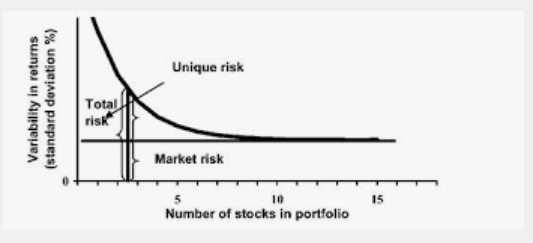

notice in the above graph how the volatility decreases as the number of assets increase, as we can see as infinite number of stocks results in a constant risk which can be said to be the minimum market risk, i.e. the systematic risk


i will also be adding a negative beta stock for hedging purposes - GOLDBEES

In [89]:
p6 = yf.download('GOLDBEES.NS','2017-06-30','2018-03-31',interval = '5d')['Adj Close']
r6 = 100*p6.pct_change()
b6 = beta(r6,r0)
#print(p6)
b6

[*********************100%***********************]  1 of 1 completed


-0.006177384093725023

##we are dealing with percent changes and not fractional changes in the df

In [90]:
stx = ['ZENTEC', 'TEJASNET', 'OLECTRA', 'HINDOILEXP', 'BLS','GOLDBEES']
df = pd.merge(p1,p2,right_index = True, left_index = True)
df = pd.merge(df,p3,right_index = True, left_index = True)
df = pd.merge(df,p4,right_index = True, left_index = True)
df = pd.merge(df,p5,right_index = True, left_index = True)
df = pd.merge(df,p6,right_index = True, left_index = True)
#df
df.set_axis(stx,axis = 1, inplace = True)
#df.iloc[[1]]
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Adj Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Adj Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  


,ZENTEC,TEJASNET,OLECTRA,HINDOILEXP,BLS,GOLDBEES
Date,,,,,,
2017-06-30,49.206520,298.126923,57.150002,71.349998,92.013618,25.768999
2017-07-05,49.255730,297.141418,64.050003,71.599998,102.123711,25.414499
2017-07-10,59.195450,361.990143,64.150002,72.599998,95.320221,25.099001
2017-07-20,55.800198,345.679413,72.099998,75.000000,93.369568,25.472500
2017-07-25,58.555763,330.847015,72.300003,76.849998,92.917603,25.676500
2017-08-04,55.111305,344.595306,79.599998,75.349998,92.085007,25.809999
2017-08-09,52.897011,320.350952,93.000000,73.750000,87.517609,25.771500
2017-08-14,48.960491,320.893005,112.750000,71.699997,85.471809,26.033001
2017-08-24,49.600178,324.983002,136.399994,73.949997,103.194183,26.007000


In [91]:
#df1 = pd.merge(r1,r2,right_index = True, left_index = True)
"""
df1.rename(columns = {
  'Adj Close_x' : 'ZENTEC'
  'Adj Close
})
df1 = pd.merge(df1,r3,right_index = True, left_index = True)
df1 = pd.merge(df1,r4,right_index = True, left_index = True)
df1 = pd.merge(df1,r5,right_index = True, left_index = True)
df1 = pd.merge(df1,r6,right_index = True, left_index = True)
df1
#print(df1)
df1 = df1[1:]
"""
#df1

"\ndf1.rename(columns = {\n  'Adj Close_x' : 'ZENTEC'\n  'Adj Close\n})\ndf1 = pd.merge(df1,r3,right_index = True, left_index = True)\ndf1 = pd.merge(df1,r4,right_index = True, left_index = True)\ndf1 = pd.merge(df1,r5,right_index = True, left_index = True)\ndf1 = pd.merge(df1,r6,right_index = True, left_index = True)\ndf1\n#print(df1)\ndf1 = df1[1:]\n"

In [92]:
df1 = 100*df.pct_change()
df1.dropna(inplace = True)
df1

,ZENTEC,TEJASNET,OLECTRA,HINDOILEXP,BLS,GOLDBEES
Date,,,,,,
2017-07-05,0.100006,-0.330565,12.073493,0.350385,10.987604,-1.375683
2017-07-10,20.179825,21.824196,0.156126,1.396648,-6.662008,-1.241411
2017-07-20,-5.735664,-4.505849,12.392824,3.305787,-2.046421,1.488103
2017-07-25,4.938272,-4.290796,0.277399,2.466665,-0.484061,0.800866
2017-08-04,-5.882355,4.155483,10.096812,-1.951854,-0.896058,0.519927
2017-08-09,-4.017859,-7.035602,16.834173,-2.123422,-4.959980,-0.149166
2017-08-14,-7.441856,0.169206,21.236559,-2.779665,-2.337586,1.014692
2017-08-24,1.306536,1.274567,20.975604,3.138075,20.734759,-0.099877
2017-08-29,-1.190497,0.409408,10.227282,8.654499,0.253588,3.154918


In [93]:
#number of iterations : 1000
ni = 1000
ns = len(stx)
#set wgts
wgts = np.zeros((ni,ns))
ret = np.zeros(ni)
v = np.zeros(ni)
s = np.zeros(ni)
rm = np.array(df1)
#print(rm)
#we are initializing the data, and also 
rm1 = np.log(1+0.01*rm)
rm1 = pd.DataFrame(rm1)
#print(rm1)
rm2 = rm1.mean()
print(rm2)
print(rm1.cov())

0    0.022777
1    0.005308
2    0.031535
3    0.012534
4   -0.012931
5    0.001846
dtype: float64
          0         1         2         3         4         5
0  0.010994  0.004063  0.001717  0.001917  0.001728 -0.000061
1  0.004063  0.005690 -0.000577  0.001774  0.001064 -0.000163
2  0.001717 -0.000577  0.011473  0.002495  0.003082  0.000450
3  0.001917  0.001774  0.002495  0.004661  0.002430  0.000150
4  0.001728  0.001064  0.003082  0.002430  0.006328 -0.000019
5 -0.000061 -0.000163  0.000450  0.000150 -0.000019  0.000119


In [94]:
sn = 0
nm = 0
for i in range (ni) :
  w = np.random.random(ns)
  #print(w)
  w = w/np.sum(w)
  #print('this')
  #print(w)
  wgts[i] = w
  ret[i] = np.sum(rm2*w)*52
  #annualized returns
  #so as to annualize the returns, to give a fair description in long run
  v[i] = np.sqrt(
      np.dot(w.T,(np.dot(rm1.cov()*52,w)))
  )
  #to get the total standrd dev in each scenario
  s[i] = ret[i]/v[i]
  #to get the sharpe ratio in each scenario
  if s[i] > sn:
    sn = s[i]
    nm = i
    #to find out the case with the highest sharpe ratio

final = [ret,v,s,wgts]
for i in final:
  print(i[nm])

1.2061302010785933
0.4964987451545161
2.4292713986683525
[0.30425741 0.09352363 0.48457758 0.04791375 0.01639002 0.05333762]


#TESTING RESULTS 
FOR THE PERIOD BWN 2017 - 07 AND 2018-03, A PERIOD OF 6 MONTHS, 
PRODUCED A RESULT OF 
###0.9810437425682268 - FRACTIONAL RETURNS ANUALIZED
###0.39852195069267454 - VOLATILITY ANNUALIZED, std dev
###2.4617056622930455 - sharpe ratio
### weights = [0.21088505 0.01244158 0.32875709 0.26597113 0.00271567 0.17922947]
###stocks = ZENTEC	TEJASNET	OLECTRA	HINDOILEXP	BLS	GOLDBEES

in a video it was said that log returns would be better

log_returns = np.log(1+price.pct_change())


In [95]:
ret[nm]

1.2061302010785933

In [98]:
w = wgts[nm]
#np.sum(wgts[i])


In [97]:
s[nm]
#our model produced

2.4292713986683525

In [70]:
v[nm]

0.39852195069267454

In [113]:
stocks = ['zentec','tejasnet','olectra','hindoilexp','bls','goldbees']
p11 = yf.download('ZENTEC.NS','2019-01-01','2019-04-01',interval = '5d')['Adj Close']
p21 = yf.download('TEJASNET.NS','2019-01-01','2019-04-01',interval = '5d')['Adj Close']
p31 = yf.download('OLECTRA.NS','2019-01-01','2019-04-01',interval = '5d')['Adj Close']
p41 = yf.download('HINDOILEXP.NS','2019-01-01','2019-04-01',interval = '5d')['Adj Close']
p51 = yf.download('BLS.NS','2019-01-01','2019-04-01',interval = '5d')['Adj Close']
p61 = yf.download('GOLDBEES.NS','2019-01-01','2019-04-01',interval = '5d')['Adj Close']
r11 = 100*p1.pct_change()
r21 = 100*p2.pct_change()
r41 = 100*p4.pct_change()
r31 = 100*p3.pct_change()
r51 = 100*p5.pct_change()
r61 = 100*p6.pct_change()

stx = ['ZENTEC', 'TEJASNET', 'OLECTRA', 'HINDOILEXP', 'BLS','GOLDBEES']
df11 = pd.merge(p11,p21,right_index = True, left_index = True)
df11 = pd.merge(df11,p31,right_index = True, left_index = True)
df11 = pd.merge(df11,p41,right_index = True, left_index = True)
df11 = pd.merge(df11,p51,right_index = True, left_index = True)
df11 = pd.merge(df11,p61,right_index = True, left_index = True)
df11
df11.set_axis(stx,axis = 1, inplace = True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Adj Close_x'} in the result is deprecated and will raise a MergeError in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Adj Close_x'} in the result is deprecated and will raise a MergeError in a future version.


In [122]:
dfpct = np.log(1+df11.pct_change())
dfpct

,ZENTEC,TEJASNET,OLECTRA,HINDOILEXP,BLS,GOLDBEES
Date,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11,-0.043219,0.062513,-0.018034,0.008379,-0.003789,0.012555
2019-01-16,0.047628,0.008813,0.068218,0.045268,0.020042,0.006271
2019-01-21,0.008761,-0.028524,-0.048033,0.004376,-0.017094,-0.004573
2019-01-31,-0.060352,-0.297919,-0.030765,-0.140874,-0.130053,0.026447
2019-02-05,-0.044662,-0.104079,-0.113940,-0.025927,0.001914,0.005318
2019-02-15,-0.056222,-0.052569,0.016989,0.088808,-0.075948,-0.001289
2019-02-20,-0.006611,0.111686,-0.001955,0.008121,-0.021371,0.015273
2019-02-25,0.053097,0.038392,0.030119,0.013111,0.106361,-0.011817


In [124]:
dfpct.dropna(inplace = True)
arr_pct = np.array(dfpct)
arr_pct

array([[-0.04321858,  0.06251306, -0.01803414,  0.00837877, -0.00378869,
         0.01255486],
       [ 0.04762809,  0.00881257,  0.06821785,  0.04526769,  0.02004236,
         0.00627099],
       [ 0.00876102, -0.02852442, -0.04803271,  0.00437634, -0.01709433,
        -0.0045727 ],
       [-0.06035209, -0.29791949, -0.03076496, -0.14087407, -0.1300531 ,
         0.02644676],
       [-0.04466225, -0.10407941, -0.11394038, -0.02592741,  0.00191374,
         0.0053183 ],
       [-0.05622246, -0.05256897,  0.01698919,  0.08880778, -0.07594827,
        -0.00128875],
       [-0.00661066,  0.11168619, -0.00195508,  0.00812141, -0.02137147,
         0.0152729 ],
       [ 0.05309717,  0.03839248,  0.03011913,  0.01311081,  0.10636104,
        -0.01181733],
       [ 0.0824587 ,  0.12715513,  0.1606064 ,  0.05755518,  0.05618418,
        -0.0429994 ],
       [-0.02872253,  0.00082882,  0.02672675,  0.00829549,  0.09559515,
         0.00119967],
       [-0.00066246, -0.0861831 ,  0.03652226, -0.

In [115]:
dfpct.mean()

ZENTEC       -0.010469
TEJASNET     -0.016341
OLECTRA       0.007034
HINDOILEXP    0.007825
BLS          -0.004311
GOLDBEES      0.000601
dtype: float64

In [116]:
ret_new = dfpct.mean()*52
ret_new = np.array(ret_new)
ret_new

array([-0.54438052, -0.84972668,  0.36575956,  0.4068746 , -0.22418794,
        0.03125905])

In [126]:
ret__net_new = np.dot(wgts[nm],ret_new)
print(ret__net_new)
vol_new = np.sqrt(
      np.dot(wgts[nm].T,(np.dot(dfpct.cov()*52,wgts[nm])))
  )
print(ret__net_new/vol_new)

-0.05037472434985616
-0.1313326983334902


In [118]:
stx

['ZENTEC', 'TEJASNET', 'OLECTRA', 'HINDOILEXP', 'BLS', 'GOLDBEES']

In [128]:
#think of more parameters to check accuracy
w_bad = np.array([1/(len(stx)) for i in range(len(stx))])
w_bad
ret_bad = np.dot(w_bad, ret_new)
print(ret_bad)
vol_new = np.sqrt(
      np.dot(w_bad.T,(np.dot(dfpct.cov()*52,w_bad)))
  )
print(ret_bad/vol_new)

-0.13573365535536466
-0.4130053057264066


In [112]:
df1

,ZENTEC,TEJASNET,OLECTRA,HINDOILEXP,BLS,GOLDBEES
Date,,,,,,
2017-07-05,0.100006,-0.330565,12.073493,0.350385,10.987604,-1.375683
2017-07-10,20.179825,21.824196,0.156126,1.396648,-6.662008,-1.241411
2017-07-20,-5.735664,-4.505849,12.392824,3.305787,-2.046421,1.488103
2017-07-25,4.938272,-4.290796,0.277399,2.466665,-0.484061,0.800866
2017-08-04,-5.882355,4.155483,10.096812,-1.951854,-0.896058,0.519927
2017-08-09,-4.017859,-7.035602,16.834173,-2.123422,-4.959980,-0.149166
2017-08-14,-7.441856,0.169206,21.236559,-2.779665,-2.337586,1.014692
2017-08-24,1.306536,1.274567,20.975604,3.138075,20.734759,-0.099877
2017-08-29,-1.190497,0.409408,10.227282,8.654499,0.253588,3.154918


In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
df1 = df1.set_axis(stx,axis = 1)

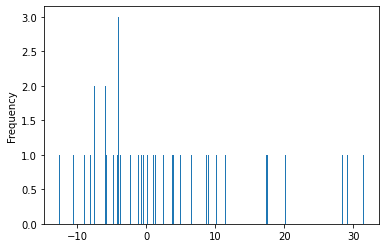

In [132]:
df1['ZENTEC'].plot.hist(bins = 300)


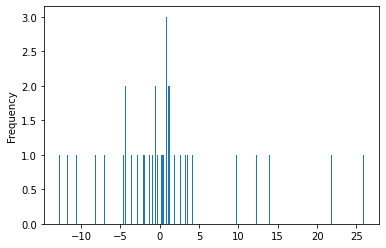

In [133]:
df1['TEJASNET'].plot.hist(bins = 300)


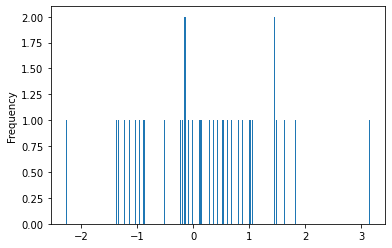

In [134]:
df1['GOLDBEES'].plot.hist(bins = 300)


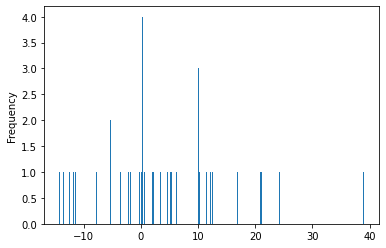

In [135]:
df1['OLECTRA'].plot.hist(bins = 300)


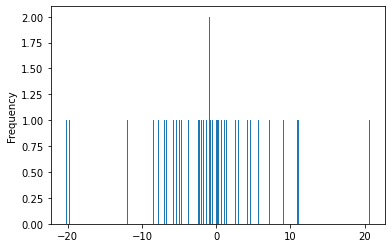

In [136]:
df1['BLS'].plot.hist(bins = 300)

In [137]:
#TO DISCUSS PORTFOLIO OPTIMIZATION TECCHNIQUES - 


SORTINO OPTIMIZATION, MAXIMISING TREYNOR RATIO OPTIMISATION, WALK FORWARD OPTIMISATION
